In [2]:
if __name__ == '__main__':
    import pandas as pd
    import numpy as np
    import os
    import datetime
    import sys 
    import csv
    from sklearn import svm


    filename = "data.csv"
    
    df = pd.read_csv(filename)

In [4]:
    list_cols = (df.columns)
    list_cols
    print(pd.DataFrame(list_cols).iloc[100:115])

                  0
100    indicator101
101    indicator102
102    indicator103
103    indicator104
104    indicator105
105    indicator106
106    indicator107
107    indicator108
108        midPrice
109      UpdateTime
110  UpdateMillisec
111       LastPrice
112          Volume
113      LastVolume
114        Turnover


In [6]:
    midp = df.loc[:,'midPrice']
    midp
    midp.to_csv('midPrice.csv')
    
    

In [7]:
    ind = 0
    n = 5
    L = []
#     ind_l = []
    for i in midp:
        if ind == 0:
            old = i
        if ind < n:
            ind += 1
            continue
        ind_l.append(ind)
        l = i - old
        old = midp.iloc[ind-n]
        L.append(l)
        ind += 1

NameError: name 'ind_l' is not defined

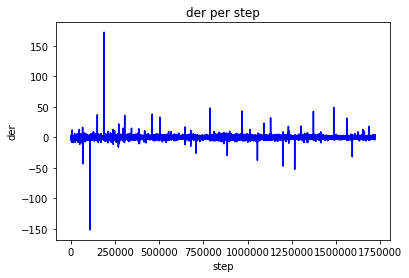

In [99]:
    import matplotlib.pyplot as plt
    plt.plot(ind_l, L, 'b-')
    plt.title('der per step')
    plt.xlabel('step')
    plt.ylabel('der')
    plt.show()

In [100]:
    dfL = pd.DataFrame(L)
    dfL.to_csv('dfL.csv')

(0.0, 1720350.0)

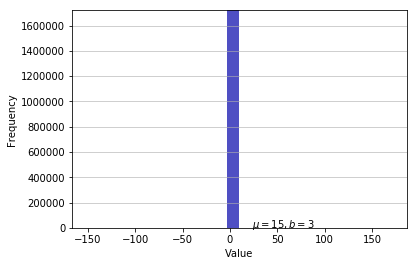

In [101]:
    n, bins, patches = plt.hist(x=L, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.text(23, 45, r'$\mu=15, b=3$')
    maxfreq = n.max()
    # 设置y轴的上限
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [103]:
    ratio_L = []
    for i in range(len(L)):
        var = float(midp.iloc[i])
        ratio_L.append(float (L[i] / var) )
    ratio_L

[0.00017801513128615933,
 0.00017801513128615933,
 0.00017801513128615933,
 0.00017798344753937884,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.00017798344753937884,
 -0.00017798344753937884,
 0.00017798344753937884,
 0.00017798344753937884,
 0.00017798344753937884,
 0.00017801513128615933,
 0.00035603026257231867,
 0.0003559035501379126,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0001779517750689563,
 0.0001779517750689563,
 0.0001779517750689563,
 0.0001779517750689563,
 0.0001779517750689563,
 0.00017792011386887289,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00017792011386887289,
 0.0002668801708033093,
 0.0005337603416066186,
 0.0005337603416066186,
 0.0002668801708033093,
 0.0003557769278662279,
 0.00017787264318747776,
 8.891259891526629e-05,
 -0.00017782519783053258,
 -0.00017787264318747776,
 8.89284126278346e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0001778568252556692,
 -0.0001778568252556692,
 -0.0001778568252556692,
 -0.0001778568252556692,
 -0.0001778568252556692,
 -0.000177

In [104]:
    ratio_L_df = pd.DataFrame(ratio_L)
    ratio_L_df[0].value_counts()
    ratio_L_df.to_csv('ratio_L.csv')

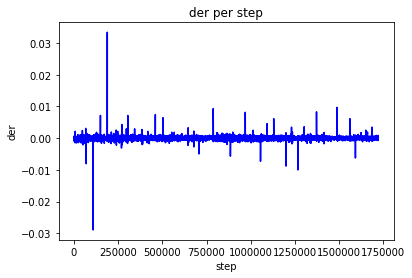

In [105]:
    plt.plot(ind_l, ratio_L, 'b-')
    plt.title('der per step')
    plt.xlabel('step')
    plt.ylabel('der')
    plt.show()

In [106]:
    abs_ratio_L_df = ratio_L_df.abs()
    me = abs_ratio_L_df.mean()
    ma = abs_ratio_L_df.max()
    me = me.iloc[0]
    ma = ma.iloc[0]
    hold = (me + (ma-me)*0.02)

In [107]:
    ind = []
    for i in range(len(abs_ratio_L_df)):
        var = abs_ratio_L_df.iloc[i,0]
        if (var >= hold):
            t = [i]
            t_var = ratio_L_df.loc[i]
            label = int (t_var > 0)*2 - 1
            t.append(label)
            ind.append(t)
    ind
        

[[1009, -1],
 [1010, -1],
 [1011, -1],
 [7271, 1],
 [7272, 1],
 [7273, 1],
 [7274, 1],
 [7275, 1],
 [7276, 1],
 [7281, -1],
 [7282, -1],
 [7283, -1],
 [14179, -1],
 [14180, -1],
 [14181, -1],
 [14182, -1],
 [14183, -1],
 [15110, -1],
 [15111, -1],
 [15112, -1],
 [15113, -1],
 [15114, -1],
 [15115, -1],
 [22141, 1],
 [22142, 1],
 [22143, 1],
 [22144, 1],
 [22313, -1],
 [22314, -1],
 [22316, -1],
 [25376, -1],
 [25377, -1],
 [25378, -1],
 [25379, -1],
 [25380, -1],
 [25381, -1],
 [25816, -1],
 [25817, -1],
 [25818, -1],
 [25819, -1],
 [25820, -1],
 [26610, -1],
 [26611, -1],
 [26612, -1],
 [26613, -1],
 [26614, -1],
 [26615, -1],
 [26616, -1],
 [26620, -1],
 [26624, 1],
 [29112, -1],
 [29113, -1],
 [29114, -1],
 [34178, 1],
 [34179, 1],
 [37590, -1],
 [37591, -1],
 [37592, -1],
 [38587, -1],
 [41402, -1],
 [41403, -1],
 [41404, -1],
 [41405, -1],
 [41409, 1],
 [41410, 1],
 [41832, -1],
 [42030, -1],
 [42493, -1],
 [42494, -1],
 [42571, 1],
 [43213, -1],
 [43214, -1],
 [43215, -1],
 [4321

In [109]:
    len(ind)

3967

In [1]:
    der_ind = []
    for i in range(len(ind)-1):
        v = ind[i+1][0] - ind[i][0]
        der_ind.append(v)
    der_ind_df = pd.DataFrame(der_ind)
    der_ind_df
    

NameError: name 'ind' is not defined